In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import clear_output

# Clear previous output
clear_output(wait=True)

# Display the new output
print("New Output")


# Amazon Book

In [ ]:
#Ran model on Amazon-book with pretrained model to get these initial results 
amazon = {   "categories":["<=7", "<=15", "<=48", "<=4475", "All"],
    "recall":[
    [0.15202, 0.21597, 0.26033, 0.29410, 0.32154],
    [0.11909, 0.18290, 0.22878, 0.26543, 0.29626],
    [0.07871, 0.13337, 0.17622, 0.20970, 0.23955],
    [0.04057, 0.07202, 0.10067, 0.12535, 0.14640],
    [0.13043, 0.19235, 0.23656, 0.27090, 0.29946],
],
"precision":[
    [0.01132, 0.00804, 0.00646, 0.00548, 0.00480],
    [0.01394, 0.01075, 0.00899, 0.00782, 0.00699],
    [0.02029, 0.01734, 0.01531, 0.01373, 0.01259],
    [0.03404, 0.03108, 0.02916, 0.02750, 0.02591],
    [0.01379, 0.01058, 0.00889, 0.00776, 0.00695],
],
"hit":[
    [0.20399, 0.28197, 0.33446, 0.37270, 0.40358],
    [0.23367, 0.34104, 0.40982, 0.45929, 0.49981],
    [0.29660, 0.44051, 0.52673, 0.58149, 0.62841],
    [0.41158, 0.57143, 0.67339, 0.73394, 0.78226],
    [0.22952, 0.32636, 0.38907, 0.43323, 0.46937],
],
"ndcg":[
    [0.08875, 0.10582, 0.11622, 0.12349, 0.12922],
    [0.08839, 0.11229, 0.12749, 0.13858, 0.14764],
    [0.09111, 0.12600, 0.15009, 0.16790, 0.18336],
    [0.10053, 0.14792, 0.18565, 0.21694, 0.24326],
    [0.08924, 0.11130, 0.12551, 0.13582, 0.14427],
]}

In [ ]:
# Function to calculate mean of each column for a given metric
def calculate_mean_per_column(metric_data):
    return list(np.mean(metric_data, axis=0))

# Calculate means for all metrics
mean_metrics = {metric: calculate_mean_per_column(data) for metric, data in amazon.items() if metric != "categories"}

# Display the result
for metric, means in mean_metrics.items():
    print(f"Mean values for {metric}: {means}")

In [ ]:
pd.DataFrame(amazon['precision']).mean()

In [ ]:
user_groups = ["<=7", "<=15", "<=48", "<=4475"]  # User groups based on sparsity
ndcg_kgat = [0.08875, 0.10582, 0.11622, 0.12349]  # KGAT NDCG values for each group
density = [40, 30, 20, 10]  # Example density percentages for user groups

# Normalize density to percentages
density_normalized = [d / sum(density) * 100 for d in density]

In [ ]:

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the histogram for density
ax1.bar(user_groups, density_normalized, color='lightgreen', alpha=0.5, label="Density (%)")
ax1.set_ylabel("Density %", color="green")
ax1.set_ylim(0, max(density_normalized) + 10)
ax1.legend(loc="upper left")

# Add a line plot for KGAT NDCG@20
ax2 = ax1.twinx()
ax2.plot(user_groups, ndcg_kgat, color='red', marker='o', linewidth=2, label="KGAT NDCG@20")
ax2.set_ylabel("NDCG@20", color="red")
ax2.set_ylim(0.08, 0.13)
ax2.legend(loc="upper right")

# Add gridlines and labels
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("NDCG and Density Across User Groups (Amazon-Book, KGAT)")
plt.xlabel("User Group")

# Display the plot
plt.show()

# Taobao

In [4]:
users = {
    'categories':['<=5', '<=7','<=11','<=37', 'all'], 
    'amt':[4205,4054,2219,570,11048]
}

In [2]:
import re
import ast

In [4]:
onehop = [{'precision': [0.00086441, 0.0007309 , 0.00073618, 0.00070148, 0.00068067], 'recall': [0.01424089, 0.02371772, 0.0354393 , 0.04519973, 0.05401732], 'ndcg': [0.00594545, 0.00832395, 0.01090935, 0.01280914, 0.01461359], 'hit_ratio': [0.01701665, 0.02878349, 0.04335626, 0.05485156, 0.06634685], 'auc': 0.6138072945508147},
{'precision': [0.00091419, 0.00093908, 0.00091721, 0.00090854, 0.0008807 ], 'recall': [0.01460381, 0.03056446, 0.04476764, 0.05869173, 0.07057925], 'ndcg': [0.00606726, 0.00992975, 0.0129577 , 0.01579979, 0.01812683], 'hit_ratio': [0.01801231, 0.03683925, 0.0538559 , 0.0711441 , 0.0858979 ], 'auc': 0.6445428699863142},
{'precision': [0.00102281, 0.00101602, 0.00102884, 0.00098547, 0.00096217], 'recall': [0.0166199 , 0.03297882, 0.04967867, 0.06239591, 0.07631245], 'ndcg': [0.00686962, 0.01081139, 0.01445126, 0.01714383, 0.01975554], 'hit_ratio': [0.02027516, 0.03982621, 0.06019189, 0.07621289, 0.09268646], 'auc': 0.6566805356004171},
{'precision': [0.00112238, 0.00114953, 0.00109975, 0.00104318, 0.00100199], 'recall': [0.018222  , 0.0370942 , 0.05283395, 0.06670072, 0.07933498], 'ndcg': [0.00808558, 0.01273055, 0.01618362, 0.01891667, 0.02143033], 'hit_ratio': [0.02217596, 0.04507603, 0.06435554, 0.0807386 , 0.09657857], 'auc': 0.6644723871735164},
{'precision': [0.00124004, 0.00118121, 0.00119026, 0.0011665 , 0.00110156], 'recall': [0.02038831, 0.03804912, 0.0572532 , 0.07404206, 0.08678192], 'ndcg': [0.00828092, 0.01266658, 0.01680116, 0.02025462, 0.022784  ], 'hit_ratio': [0.02443881, 0.0461622 , 0.06951484, 0.09006155, 0.10599203], 'auc': 0.6700383157359046},
{'precision': [0.00123099, 0.00127851, 0.00129435, 0.00124117, 0.00118573], 'recall': [0.02029025, 0.04146301, 0.06160089, 0.07854966, 0.0929218 ], 'ndcg': [0.00841624, 0.01359136, 0.01811198, 0.02152747, 0.02439542], 'hit_ratio': [0.0243483 , 0.05023534, 0.07530775, 0.09567343, 0.11359522], 'auc': 0.6739612703404678},
{'precision': [0.00143917, 0.00145728, 0.00141353, 0.0013034 , 0.00124276], 'recall': [0.02295287, 0.04608225, 0.06695631, 0.08245685, 0.09783671], 'ndcg': [0.00957667, 0.01533137, 0.01988426, 0.02297157, 0.02597165], 'hit_ratio': [0.02814989, 0.05675235, 0.08191528, 0.10056119, 0.11947864], 'auc': 0.6772809445617406},
{'precision': [0.0016202 , 0.00151611, 0.00148292, 0.00138713, 0.00131608], 'recall': [0.02589458, 0.04865134, 0.07045619, 0.08723147, 0.10333846], 'ndcg': [0.01113499, 0.01671702, 0.0215448 , 0.02501489, 0.02806653], 'hit_ratio': [0.03149891, 0.05910572, 0.08598841, 0.10698769, 0.12590514], 'auc': 0.6805506841426806},
{'precision': [0.00171977, 0.00160436, 0.00152969, 0.00141768, 0.00134776], 'recall': [0.02777275, 0.05170619, 0.07250483, 0.08935554, 0.10569334], 'ndcg': [0.01152924, 0.01737218, 0.0220685 , 0.0254358 , 0.02859787], 'hit_ratio': [0.03367125, 0.06263577, 0.08870384, 0.10861694, 0.12834902], 'auc': 0.6829932227076403},
{'precision': [0.00192343, 0.00165188, 0.00155684, 0.00145501, 0.00139392], 'recall': [0.03078234, 0.05237082, 0.07336256, 0.09123155, 0.10903115], 'ndcg': [0.01373151, 0.01907784, 0.02366408, 0.02726148, 0.03065247], 'hit_ratio': [0.03792542, 0.06426503, 0.08951846, 0.11115134, 0.13196959], 'auc': 0.6858936344417963},
{'precision': [0.00202299, 0.00180123, 0.00164434, 0.00155684, 0.00147538], 'recall': [0.03223057, 0.05625   , 0.07752685, 0.09762099, 0.11570657], 'ndcg': [0.01399657, 0.02016987, 0.02468147, 0.02874688, 0.03222123], 'hit_ratio': [0.03955467, 0.06969587, 0.09440623, 0.1185735 , 0.14065894], 'auc': 0.6932940165227728},
{'precision': [0.00203657, 0.00178992, 0.00164736, 0.00156137, 0.00148715], 'recall': [0.03210988, 0.05551834, 0.07615341, 0.09642405, 0.11508353], 'ndcg': [0.01452752, 0.02048924, 0.02509397, 0.0291983 , 0.03272662], 'hit_ratio': [0.03991673, 0.0692433 , 0.09467777, 0.11893555, 0.14083997], 'auc': 0.6953928946107751},
{'precision': [0.00213161, 0.00186685, 0.00168809, 0.00156929, 0.00147991], 'recall': [0.03313571, 0.05758961, 0.07838372, 0.09713609, 0.11489496], 'ndcg': [0.01478491, 0.02097567, 0.02550709, 0.02929961, 0.03264148], 'hit_ratio': [0.04172701, 0.07213975, 0.09685011, 0.11929761, 0.14011586], 'auc': 0.6980298155707761},
{'precision': [0.00218592, 0.00190985, 0.00171223, 0.00159871, 0.0015143 ], 'recall': [0.03478005, 0.06032314, 0.07999487, 0.09904658, 0.11748453], 'ndcg': [0.01474888, 0.02109476, 0.02545393, 0.02939515, 0.03292247], 'hit_ratio': [0.04290369, 0.07431209, 0.09766474, 0.12101738, 0.14310282], 'auc': 0.7011678651480727},
{'precision': [0.00214066, 0.00190306, 0.00176503, 0.00163491, 0.00152426], 'recall': [0.03364108, 0.05900012, 0.0818127 , 0.10168055, 0.11801382], 'ndcg': [0.01501925, 0.02145761, 0.02645105, 0.03036779, 0.03356744], 'hit_ratio': [0.04208907, 0.07376901, 0.10074222, 0.12391383, 0.14364591], 'auc': 0.7031373618630653},
{'precision': [0.00214066, 0.00193474, 0.00180576, 0.00166999, 0.00158219], 'recall': [0.03430485, 0.06056451, 0.08464881, 0.10429576, 0.12326687], 'ndcg': [0.01522466, 0.02185473, 0.02711215, 0.03101112, 0.03471023], 'hit_ratio': [0.04199855, 0.07467415, 0.10363867, 0.12635771, 0.14961984], 'auc': 0.7063398850260612},
{'precision': [0.00222665, 0.00196868, 0.00176201, 0.00169261, 0.00160572], 'recall': [0.03611513, 0.06217867, 0.08316287, 0.1062569 , 0.12600277], 'ndcg': [0.01554685, 0.02217555, 0.02670128, 0.0313678 , 0.03508932], 'hit_ratio': [0.04362781, 0.07648443, 0.10119479, 0.12871108, 0.15179218], 'auc': 0.7079722247465402},
{'precision': [0.00229906, 0.00193927, 0.00181481, 0.00173448, 0.00162111], 'recall': [0.03642978, 0.06079618, 0.08566493, 0.10849497, 0.12669585], 'ndcg': [0.01586098, 0.02198141, 0.02734487, 0.03201907, 0.03552401], 'hit_ratio': [0.04516655, 0.07503621, 0.10472484, 0.13215062, 0.15432657], 'auc': 0.7096451205118409},
{'precision': [0.00227643, 0.00197547, 0.00186761, 0.00174692, 0.00163106], 'recall': [0.03568605, 0.06224441, 0.08808619, 0.10952079, 0.1270051 ], 'ndcg': [0.01610577, 0.02263071, 0.02821322, 0.03255163, 0.03602083], 'hit_ratio': [0.04462346, 0.07648443, 0.10716872, 0.1326937 , 0.1545076 ], 'auc': 0.7112612432238944},
{'precision': [0.00232621, 0.00200941, 0.00188119, 0.00172769, 0.00162835], 'recall': [0.03656857, 0.06328532, 0.08797304, 0.10823851, 0.12789516], 'ndcg': [0.01654654, 0.02316361, 0.02864268, 0.03260597, 0.03627893], 'hit_ratio': [0.04543809, 0.07802317, 0.10807386, 0.13160753, 0.1545076 ], 'auc': 0.7125047884307444},
{'precision': [0.00235789, 0.00200036, 0.00188119, 0.00175937, 0.00163831], 'recall': [0.03727759, 0.06305149, 0.08816162, 0.10973285, 0.12782814], 'ndcg': [0.0166584 , 0.02298532, 0.02853265, 0.03288737, 0.03632424], 'hit_ratio': [0.0461622 , 0.07738957, 0.10789283, 0.13350833, 0.15486966], 'auc': 0.713702763830477},
{'precision': [0.00236694, 0.00207504, 0.00191437, 0.00176503, 0.00166184], 'recall': [0.03725281, 0.06501047, 0.0896885 , 0.10972229, 0.12949747], 'ndcg': [0.01736343, 0.02426795, 0.02966855, 0.03374776, 0.03749306], 'hit_ratio': [0.04589066, 0.080105  , 0.1096126 , 0.13359884, 0.15713251], 'auc': 0.7155070941270957},
{'precision': [0.00238957, 0.00207051, 0.00192493, 0.00179444, 0.00169261], 'recall': [0.03801378, 0.06533697, 0.0904999 , 0.1117136 , 0.13204911], 'ndcg': [0.01751418, 0.02435096, 0.02983789, 0.03421069, 0.03804993], 'hit_ratio': [0.04652426, 0.08019551, 0.11051774, 0.13604272, 0.16011948], 'auc': 0.7164366636515496},
{'precision': [0.00241673, 0.00209993, 0.00192795, 0.0018001 , 0.00168175], 'recall': [0.03878832, 0.06661171, 0.09073911, 0.11325752, 0.13147133], 'ndcg': [0.0180347 , 0.02501818, 0.03035425, 0.03478684, 0.03836963], 'hit_ratio': [0.04715786, 0.08182476, 0.11097031, 0.13740043, 0.15948588], 'auc': 0.7168962537692775},
{'precision': [0.0024122 , 0.00211577, 0.00198226, 0.00181594, 0.00168899], 'recall': [0.0382754 , 0.06632508, 0.09323579, 0.11386547, 0.1317405 ], 'ndcg': [0.0178406 , 0.02498676, 0.03081778, 0.03494103, 0.03843644], 'hit_ratio': [0.04688631, 0.08227734, 0.11440985, 0.13893917, 0.16057205], 'auc': 0.7187796270961584},
{'precision': [0.00243483, 0.0021746 , 0.00196717, 0.00180463, 0.0016908 ], 'recall': [0.03865255, 0.06783365, 0.09254185, 0.11256056, 0.1315821 ], 'ndcg': [0.01804099, 0.02551117, 0.03078798, 0.03489703, 0.03856833], 'hit_ratio': [0.0474294 , 0.08426865, 0.11368573, 0.13767198, 0.16048154], 'auc': 0.7196646965439044},
{'precision': [0.00252987, 0.00221986, 0.0019536 , 0.00183517, 0.00172972], 'recall': [0.0403249 , 0.06981742, 0.09191795, 0.11478871, 0.13452165], 'ndcg': [0.01801099, 0.02552587, 0.03030879, 0.03489653, 0.03877048], 'hit_ratio': [0.0493302 , 0.08616944, 0.11287111, 0.13957277, 0.16364953], 'auc': 0.7196871371384409},
{'precision': [0.00266112, 0.0021746 , 0.00200036, 0.00185101, 0.00173968], 'recall': [0.04266383, 0.06842049, 0.09388297, 0.11534236, 0.13565308], 'ndcg': [0.01871657, 0.0252673 , 0.0308623 , 0.03516653, 0.03899303], 'hit_ratio': [0.05186459, 0.0846307 , 0.11558653, 0.14047791, 0.1641021 ], 'auc': 0.720795274135},
{'precision': [0.00264301, 0.00222438, 0.00204562, 0.00189175, 0.00176865], 'recall': [0.0420423 , 0.06953165, 0.09551675, 0.11807739, 0.13780732], 'ndcg': [0.0190499 , 0.02607853, 0.03175301, 0.03624145, 0.04003076], 'hit_ratio': [0.05177408, 0.08625996, 0.1173063 , 0.14400797, 0.16745112], 'auc': 0.7213066572707496},
{'precision': [0.00268374, 0.0022538 , 0.00206523, 0.00189401, 0.00176684], 'recall': [0.04263818, 0.07043141, 0.09622578, 0.1178565 , 0.13758103], 'ndcg': [0.01934839, 0.02640892, 0.03207367, 0.03632892, 0.0400654 ], 'hit_ratio': [0.05276973, 0.08734613, 0.11830196, 0.14346488, 0.16654598], 'auc': 0.7225519695411319},
{'precision': [0.00272448, 0.00230358, 0.00207428, 0.00193248, 0.00179218], 'recall': [0.04286684, 0.0722794 , 0.09698545, 0.12012689, 0.13896891], 'ndcg': [0.02010188, 0.02746093, 0.03289304, 0.03755173, 0.04119088], 'hit_ratio': [0.05331282, 0.08924692, 0.11929761, 0.14663287, 0.16917089], 'auc': 0.7234786058090467},
{'precision': [0.00276973, 0.00230132, 0.00210898, 0.00193248, 0.00178765], 'recall': [0.04368147, 0.07201239, 0.09834769, 0.11962152, 0.13850126], 'ndcg': [0.02011906, 0.02725112, 0.03302892, 0.03740652, 0.04096659], 'hit_ratio': [0.05458001, 0.08951846, 0.12119841, 0.14708545, 0.16889935], 'auc': 0.723374167568908},
{'precision': [0.00276521, 0.00231264, 0.00211049, 0.00193587, 0.00179671], 'recall': [0.04353514, 0.07256302, 0.09854057, 0.11982432, 0.13991479], 'ndcg': [0.02038869, 0.02767897, 0.03344065, 0.03781192, 0.04153641], 'hit_ratio': [0.05430847, 0.09015206, 0.12174149, 0.14699493, 0.1705286 ], 'auc': 0.7241358792991376},
{'precision': [0.00280594, 0.00240089, 0.002112  , 0.00196868, 0.00179037], 'recall': [0.04463639, 0.07560731, 0.09879487, 0.12243199, 0.13931589], 'ndcg': [0.02057001, 0.02837832, 0.03351248, 0.03839626, 0.04160891], 'hit_ratio': [0.05521361, 0.09332006, 0.12119841, 0.15034395, 0.17025706], 'auc': 0.7255027352809469},
{'precision': [0.00275615, 0.002376  , 0.00211501, 0.0019585 , 0.00184649], 'recall': [0.04407822, 0.07427524, 0.09873216, 0.12193933, 0.14325109], 'ndcg': [0.020246  , 0.0280062 , 0.03339876, 0.0380086 , 0.04214315], 'hit_ratio': [0.05430847, 0.0923244 , 0.12210355, 0.14916727, 0.17460174], 'auc': 0.7266934638900824},
{'precision': [0.00284214, 0.00246877, 0.00219346, 0.00199697, 0.0018483 ], 'recall': [0.04462885, 0.07762426, 0.10269215, 0.12415477, 0.14408835], 'ndcg': [0.02125325, 0.02949017, 0.0350474 , 0.03946237, 0.04321677], 'hit_ratio': [0.05566618, 0.09585445, 0.12653874, 0.15233526, 0.17586894], 'auc': 0.728724527387091},
{'precision': [0.00286025, 0.00242578, 0.00218139, 0.00200036, 0.00187002], 'recall': [0.04522021, 0.07682472, 0.10268913, 0.12512241, 0.14557429], 'ndcg': [0.0207131 , 0.02855724, 0.03426951, 0.0388092 , 0.04281289], 'hit_ratio': [0.0557567 , 0.09449674, 0.12590514, 0.15260681, 0.17740768], 'auc': 0.7283683236286327},
{'precision': [0.00294171, 0.00246198, 0.00220704, 0.00200149, 0.00187002], 'recall': [0.04579562, 0.07722449, 0.10329342, 0.1247054 , 0.14561502], 'ndcg': [0.02141684, 0.02915566, 0.03489081, 0.03922528, 0.04320023], 'hit_ratio': [0.05711441, 0.09558291, 0.12726285, 0.15269732, 0.17731716], 'auc': 0.7294786588726174},
{'precision': [0.00298697, 0.00251629, 0.00227341, 0.00205014, 0.00188269], 'recall': [0.04702295, 0.0791102 , 0.1065015 , 0.12810722, 0.1467305 ], 'ndcg': [0.02162607, 0.02962736, 0.0356281 , 0.03993305, 0.04352503], 'hit_ratio': [0.05838161, 0.09784576, 0.13088342, 0.15595583, 0.17804127], 'auc': 0.7303375111978582},
{'precision': [0.00300507, 0.00253666, 0.00221307, 0.00206485, 0.00190261], 'recall': [0.04730203, 0.08043774, 0.10419339, 0.12932916, 0.14838023], 'ndcg': [0.02174732, 0.02974159, 0.03495306, 0.04005568, 0.04377076], 'hit_ratio': [0.05874366, 0.09829833, 0.12653874, 0.157042  , 0.17985156], 'auc': 0.7309364938587305},
{'precision': [0.00286477, 0.00246198, 0.00222363, 0.00203996, 0.0018836 ], 'recall': [0.04495535, 0.07785594, 0.10517396, 0.12850484, 0.14703868], 'ndcg': [0.02083757, 0.02886343, 0.03471427, 0.03937152, 0.0430526 ], 'hit_ratio': [0.0557567 , 0.09558291, 0.1275344 , 0.15486966, 0.17722665], 'auc': 0.7316810134284332},
{'precision': [0.00286025, 0.00248688, 0.0022357 , 0.00207164, 0.00191437], 'recall': [0.04523443, 0.07829342, 0.10543796, 0.12970199, 0.14927567], 'ndcg': [0.02078456, 0.02901838, 0.03489157, 0.03981345, 0.04361263], 'hit_ratio': [0.05539464, 0.09621651, 0.12825851, 0.15731354, 0.18084721], 'auc': 0.7312856508611093},
{'precision': [0.00297791, 0.0025344 , 0.00223419, 0.00205806, 0.00191799], 'recall': [0.04708243, 0.07937981, 0.10446364, 0.12814817, 0.14941144], 'ndcg': [0.02146437, 0.02960105, 0.03510906, 0.03989704, 0.04391483], 'hit_ratio': [0.05774801, 0.09784576, 0.12798697, 0.15604634, 0.18102824], 'auc': 0.7316585521475443},
{'precision': [0.00298697, 0.00253213, 0.0022538 , 0.00203544, 0.00189718], 'recall': [0.04731626, 0.0793033 , 0.10549593, 0.12692084, 0.14719169], 'ndcg': [0.02130601, 0.0293878 , 0.03506624, 0.03937686, 0.04335012], 'hit_ratio': [0.05820058, 0.09793628, 0.12862056, 0.15414555, 0.17876539], 'auc': 0.732053911126602},
{'precision': [0.00305033, 0.0025525 , 0.00223721, 0.00208522, 0.00192343], 'recall': [0.04798757, 0.08000112, 0.10455092, 0.12966428, 0.14915369], 'ndcg': [0.02196829, 0.02992431, 0.03535442, 0.04043379, 0.04421629], 'hit_ratio': [0.05919623, 0.09820782, 0.12771542, 0.15776611, 0.18129978], 'auc': 0.7336052216203414},
{'precision': [0.0030277 , 0.00252534, 0.00226889, 0.00207843, 0.00193791], 'recall': [0.047799  , 0.07940976, 0.10649482, 0.12975479, 0.15031982], 'ndcg': [0.021976  , 0.02980505, 0.03574903, 0.04040597, 0.044448  ], 'hit_ratio': [0.05919623, 0.09739319, 0.13024982, 0.15731354, 0.18256698], 'auc': 0.7339460866481107},
{'precision': [0.00294171, 0.00252987, 0.00226285, 0.00206598, 0.00192343], 'recall': [0.04657706, 0.07923951, 0.10638922, 0.12860074, 0.14952243], 'ndcg': [0.02190704, 0.03010586, 0.03596024, 0.04057003, 0.04455212], 'hit_ratio': [0.05756698, 0.09703114, 0.12943519, 0.15686097, 0.18129978], 'auc': 0.7344678935902925},
{'precision': [0.00291003, 0.00244841, 0.00224928, 0.00208861, 0.00193519], 'recall': [0.04618483, 0.07653378, 0.10499164, 0.12985069, 0.14979182], 'ndcg': [0.02138274, 0.02902596, 0.03529915, 0.04027013, 0.04414938], 'hit_ratio': [0.05675235, 0.09440623, 0.12898262, 0.15812817, 0.18166184], 'auc': 0.7344027985931562},
{'precision': [0.00294171, 0.00252987, 0.00226285, 0.00206598, 0.00192343], 'recall': [0.04657706, 0.07923951, 0.10638922, 0.12860074, 0.14952243], 'ndcg': [0.02190704, 0.03010586, 0.03596024, 0.04057003, 0.04455212], 'hit_ratio': [0.05756698, 0.09703114, 0.12943519, 0.15686097, 0.18129978], 'auc': 0.7344678935902925}
]

In [5]:
categories = ['<=5', '<=7', '<=11', '<=37', 'all']

# Initialize a dictionary to organize data by category
category_data = {cat: {metric: [] for metric in onehop[0].keys() if metric != 'auc'} for cat in categories}


In [6]:

# Process each dictionary in onehop
for data in onehop:
    for metric, values in data.items():
        if metric == 'auc':
            continue  # Skip auc as it is not category-specific
        for idx, value in enumerate(values):
            category_data[categories[idx]][metric].append(value)


In [7]:
cat1 = category_data['<=5']
cat2 = category_data['<=7']
cat3 = category_data['<=11']
cat4 = category_data['<=37']
cat5 = category_data['all']

In [8]:
import numpy as np

In [16]:
def metric(metric, math): 
    results = [math(cat1[str(metric)]), math(cat2[str(metric)]),math(cat3[str(metric)]),math(cat4[str(metric)])]
    return results

In [18]:
t = metric('ndcg',np.mean )
t

[0.016822314285714287,
 0.023553701428571428,
 0.028692698775510207,
 0.032840248163265306]

In [ ]:
users = {
    'categories':['<=5', '<=7','<=11','<=37', 'all'], 
    'amt':[4205,4054,2219,570,11048]
}

In [ ]:
mean_ndcg = [np.mean(cat1['ndcg']), np.mean(cat1['ndcg']), np.mean(cat1['ndcg']), np.mean(cat1['ndcg'])]

In [ ]:

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the histogram for density
ax1.bar(categories, density_normalized, color='lightgreen', alpha=0.5, label="Density (%)")
ax1.set_ylabel("Density %", color="green")
ax1.set_ylim(0, max(density_normalized) + 10)
ax1.legend(loc="upper left")

# Add a line plot for KGAT NDCG@20
ax2 = ax1.twinx()
ax2.plot(user_groups, ndcg_kgat, color='red', marker='o', linewidth=2, label="KGAT NDCG@20")
ax2.set_ylabel("NDCG@20", color="red")
ax2.set_ylim(0.08, 0.13)
ax2.legend(loc="upper right")

# Add gridlines and labels
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("NDCG and Density Across User Groups (Amazon-Book, KGAT)")
plt.xlabel("User Group")

# Display the plot
plt.show()

In [24]:
amazon = {
    'categories': ['<7', '<15', '<48', '<4475'], 
    'ndcg': [np.mean([0.08875,0.08839,0.09111,0.10053,0.08924]), 
            np.mean([0.10582,0.11229,0.12600,0.14792,0.11130]), 
            np.mean([0.11622,0.12749,0.15009,0.18565,0.12551]), 
            np.mean([0.12349,0.13858,0.16790,0.21694,0.13582])], 
    'num_users': [39281,20880, 8547,1883], 
    'density': [1883/70591, 8547/70591,20880/70591,   39281/70591 ]
}

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data
amazon = {
    'categories': ['<7', '<15', '<48', '<4475'],
    'ndcg': [
        np.mean([0.08875, 0.08839, 0.09111, 0.10053, 0.08924]),
        np.mean([0.10582, 0.11229, 0.12600, 0.14792, 0.11130]),
        np.mean([0.11622, 0.12749, 0.15009, 0.18565, 0.12551]),
        np.mean([0.12349, 0.13858, 0.16790, 0.21694, 0.13582]),
    ],
    'num_users': [39281, 20880, 8547, 1883],
    'density': [ 39281 / 70591,  20880 / 70591,8547 / 70591,1883 / 70591],
}

categories = amazon['categories']
ndcg_values = amazon['ndcg']
density_values = [d * 100 for d in amazon['density']]  # Convert density to percentage


In [35]:
onehop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37', 'all'], 'ndcg': [0.0168, 0.0236, 0.0287, 0.0328], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}
twohop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37', 'all'], 'ndcg': [0.0162, 0.0224, 0.0272, 0.0311], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}
threehop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37', 'all'], 'ndcg': [0.0143, 0.0203, 0.0249, 0.0286], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}

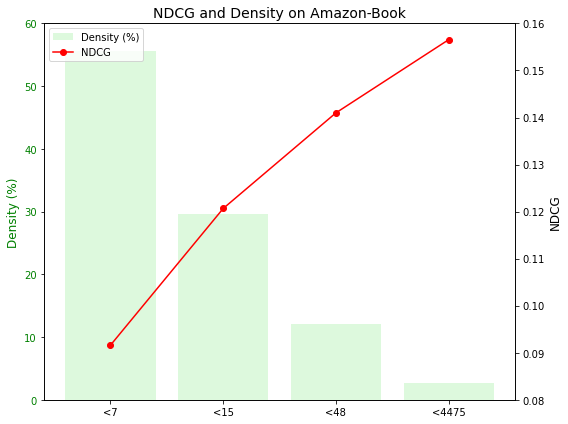

In [54]:

# Plot setup
fig, ax1 = plt.subplots(figsize=(8, 6))

amazon = {
    'categories': ['<7', '<15', '<48', '<4475'],
    'ndcg': [
        np.mean([0.08875, 0.08839, 0.09111, 0.10053, 0.08924]),
        np.mean([0.10582, 0.11229, 0.12600, 0.14792, 0.11130]),
        np.mean([0.11622, 0.12749, 0.15009, 0.18565, 0.12551]),
        np.mean([0.12349, 0.13858, 0.16790, 0.21694, 0.13582]),
    ],
    'num_users': [39281, 20880, 8547, 1883],
    'density': [ 39281 / 70591,  20880 / 70591,8547 / 70591,1883 / 70591],
}

categories = amazon['categories']
ndcg_values = amazon['ndcg']
density_values = [d * 100 for d in amazon['density']]  # Convert density to percentage
# Secondary y-axis for density

ax1.bar(categories, density_values, alpha=0.3, color='lightgreen', label='Density (%)')
ax1.set_ylabel('Density (%)', fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(0, 60)  # Adjust y-axis limits for density percentage

# Plot NDCG line
ax2 = ax1.twinx()
ax2.plot(categories, ndcg_values, marker='o', color='red', label='NDCG')
ax2.set_ylabel('NDCG', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0.08, 0.16)  # Adjust y-axis limits for NDCG

# Titles and labels
plt.title('NDCG and Density on Amazon-Book', fontsize=14)
ax2.set_xlabel('User Group', fontsize=12)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax2.legend(lines + bars, labels + bar_labels, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [42]:


onehop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37'], 'ndcg': [0.0168, 0.0236, 0.0287, 0.0328], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706*100, 0.36694424330195513*100, 0.20085083272990586*100, 0.05159304851556843*100]}
twohop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37'], 'ndcg': [0.0162, 0.0224, 0.0272, 0.0311], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}
threehop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37'], 'ndcg': [0.0143, 0.0203, 0.0249, 0.0286], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}


categories = onehop_taobao['categories']
density_values = onehop_taobao['density']

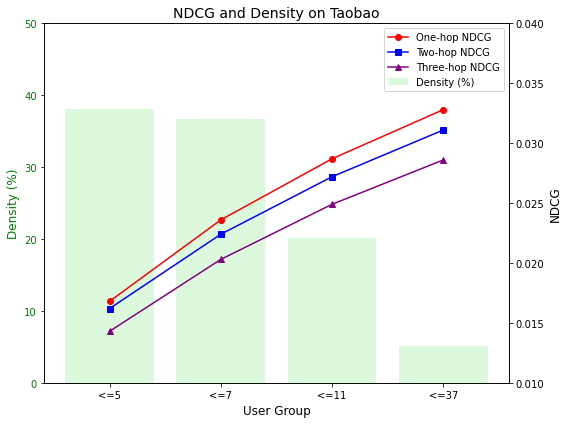

In [46]:

# Plot setup
fig, ax1 = plt.subplots(figsize=(8, 6))

# Density bars
ax1.bar(categories, density_values, alpha=0.3, color='lightgreen', label='Density (%)')
ax1.set_ylabel('Density (%)', fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(0, 50)  # Adjust limits based on your data

# NDCG lines
ax2 = ax1.twinx()
ax2.plot(categories, onehop_ndcg, marker='o', color='red', label='One-hop NDCG')
ax2.plot(categories, twohop_ndcg, marker='s', color='blue', label='Two-hop NDCG')
ax2.plot(categories, threehop_ndcg, marker='^', color='purple', label='Three-hop NDCG')
ax2.set_ylabel('NDCG', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0.01, 0.04)  # Adjust limits for NDCG values

# Titles and labels
plt.title('NDCG and Density on Taobao', fontsize=14)
ax1.set_xlabel('User Group', fontsize=12)

# Combine legends
lines, labels = ax2.get_legend_handles_labels()
bars, bar_labels = ax1.get_legend_handles_labels()
ax2.legend(lines + bars, labels + bar_labels, loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

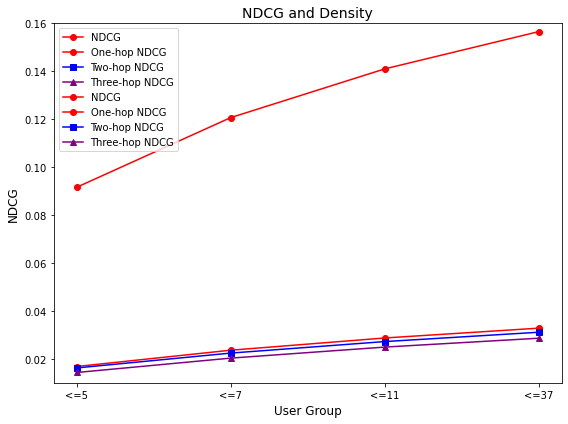

In [52]:
# Plot setup
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot NDCG line

ax1.plot(categories, ndcg_values, marker='o', color='red', label='NDCG')
ax1.set_ylabel('NDCG', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.plot(categories, onehop_ndcg, marker='o', color='red', label='One-hop NDCG')
ax1.plot(categories, twohop_ndcg, marker='s', color='blue', label='Two-hop NDCG')
ax1.plot(categories, threehop_ndcg, marker='^', color='purple', label='Three-hop NDCG')
ax1.set_ylabel('NDCG', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax1.set_ylim(0.01, 0.16)  # Adjust y-axis limits for NDCG

# Titles and labels
plt.title('NDCG and Density', fontsize=14)
ax1.set_xlabel('User Group', fontsize=12)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()
